In [1]:
from amplpy import AMPL
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
pd.set_option("display.max_columns", None)

In [2]:
url = 'https://raw.githubusercontent.com/HughP01/MScAI_AIDD/refs/heads/main/Data/sp100_daily_change.csv'
daily_returns = pd.read_csv(url,index_col=0,parse_dates=[0])
daily_returns.head()

,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,AVGO,AXP,BA,BAC,BK,BKNG,BLK,BMY,C,CAT,CHTR,CL,CMCSA,COF,COP,COST,CRM,CSCO,CVS,CVX,DE,DHR,DIS,DUK,EMR,FDX,GD,GE,GILD,GM,GOOG,GOOGL,GS,HD,HON,IBM,INTC,INTU,ISRG,JNJ,JPM,KO,LIN,LLY,LMT,LOW,MA,MCD,MDLZ,MDT,MET,META,MMM,MO,MRK,MS,MSFT,NEE,NFLX,NKE,NOW,NVDA,ORCL,PEP,PFE,PG,PLTR,PM,PYPL,QCOM,RTX,SBUX,SCHW,SO,SPG,T,TGT,TMO,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-01-03 00:00:00-05:00,-0.748758,0.400442,-0.300416,-2.594265,-1.427419,-0.334115,-2.352428,1.109657,-1.882910,-0.973782,-2.469183,-1.056750,-3.118045,-1.091455,-1.107295,-2.048235,-2.017983,-0.871862,1.131214,-2.873162,-1.236238,-1.028253,-0.824345,-1.052156,1.989978,-0.916002,-1.674938,0.778130,0.037107,1.906609,-1.885716,-1.695135,1.036271,0.991728,-1.251554,-1.823676,-0.796592,-1.500606,0.288336,-2.163641,0.573245,0.542819,-1.676533,-1.976360,-2.138755,-0.866870,-1.569048,-2.090225,-2.673879,0.625113,-0.435844,0.234031,-0.212420,4.305980,0.657721,-2.917906,-0.739540,-0.892115,-0.758399,0.434574,-0.341498,-0.525571,-2.009088,-0.432884,1.351127,-2.119277,-0.072793,0.682152,0.375669,-2.355704,-1.777407,-1.243562,-1.537578,0.023144,0.000000,-0.605094,-2.955367,-0.146494,-4.604618,-1.875480,0.457650,-0.469732,-2.966699,1.961914,-2.055540,-0.115936,-3.095766,-2.817243,0.105001,-4.013365,-1.488825,0.498759,-0.710673,-0.505246,-2.641765,-0.343806,0.720179,-1.317670,0.006263,0.840170
2024-01-04 00:00:00-05:00,-1.270013,0.623227,1.333086,-0.245619,-0.828974,0.029136,0.509893,0.824770,0.358658,-2.626789,-0.904053,0.764578,0.422286,0.805254,0.405416,0.312958,0.229540,0.657634,0.242360,0.633142,-2.824117,0.563261,-1.570084,-0.726761,-2.876676,0.567691,-0.238245,-0.851314,-0.457455,-1.096296,-0.244054,0.784189,-1.189315,-0.293592,0.443587,-0.948954,-0.140338,0.483662,1.197898,0.623766,-1.652906,-1.821190,0.303834,0.097564,0.180903,0.474708,-0.382561,-0.730808,0.353889,-0.211210,0.663626,-0.333554,-0.029354,-0.518049,-0.272256,-0.494648,0.238798,-0.900177,0.000000,0.877403,0.551261,0.769290,0.352535,0.289840,1.951726,0.261133,-0.717757,-0.306498,0.937780,-1.672427,-0.507921,0.901851,0.126869,-0.855739,-2.152706,0.547881,0.994406,0.251523,-0.307011,-1.039253,-0.233626,0.343244,-0.238639,-0.733668,0.121366,-0.464293,1.139394,1.614907,0.135726,-0.218077,-1.361403,0.625417,-0.264788,-0.349118,1.076023,0.631824,0.536256,1.232544,-0.966720,-0.871930
2024-01-05 00:00:00-05:00,-0.401308,0.421155,-0.162180,-0.139426,-0.432063,0.553717,1.889572,-0.056076,-0.547669,0.463442,0.025751,1.025975,1.657548,1.863901,0.730617,-0.345027,-0.396981,0.365098,1.041472,0.989162,-0.944774,-0.448081,0.961766,2.042081,0.042921,1.181480,-0.047765,0.019982,1.130287,-0.172591,0.909810,-1.001623,0.375449,0.050777,0.389070,0.619684,-0.889996,1.307545,-1.384957,1.408845,-0.470872,-0.483929,0.911349,1.284734,-0.668618,-1.056814,0.042666,0.374912,-0.238188,0.311272,0.501727,-0.150615,0.129716,0.659057,-0.299209,0.610734,-0.083371,-0.942621,-0.259290,0.76255

In [3]:
#Initialize AMPL
ampl = AMPL()
print("AMPL eval")
ampl.eval("""
    option gurobi_options 'Threads=16 timelimit=900'; #Let it run for 15 mins, using all 16 cores

    set STOCKS;
    set DAYS ordered;

    param daily_returns {DAYS, STOCKS};
    param q := 70;  #Number of stocks to select
    param n_days := card(DAYS);
    param n_stocks := card(STOCKS);

    #Benchmark weights (equal weighted)
    param benchmark_weights {s in STOCKS} := 1 / n_stocks;
    param benchmark_returns {d in DAYS} :=
        sum {s in STOCKS} daily_returns[d,s] * benchmark_weights[s];

    #Variables
    var weights {STOCKS} >= 0;
    var selected {STOCKS} binary;

    #Portfolio returns expression
    var portfolio_returns {d in DAYS} =
        sum {s in STOCKS} daily_returns[d,s] * weights[s];

    #Tracking error variance
    minimize tracking_error:
        (sum {d in DAYS} (portfolio_returns[d] - benchmark_returns[d])^2) / n_days;

    #Set our Constraints
    subject to sum_weights:
        sum {s in STOCKS} weights[s] = 1;

    subject to min_weight {s in STOCKS}:
        weights[s] >= 0.005 * selected[s];  #Min 0.5% if selected

    subject to max_weight {s in STOCKS}:
        weights[s] <= 0.2 * selected[s];    #Max 20% if selected

    subject to select_q_stocks:
        sum {s in STOCKS} selected[s] = q;  #Exactly q stocks
""")

#data
tickers = daily_returns.columns.tolist()
dates = daily_returns.index.astype(str).tolist()
ampl.set['STOCKS'] = tickers
ampl.set['DAYS'] = dates

returns_records = daily_returns.stack().reset_index()
returns_records.columns = ['Date', 'Stock', 'Return']
ampl.param['daily_returns'] = {
    (str(row['Date']), row['Stock']): row['Return']
    for _, row in returns_records.iterrows()
}
print("solving")
#Set solver
ampl.option['solver'] = 'gurobi'

#Solve the problem
ampl.solve()

#Get solution status
solve_result = ampl.get_value('solve_result')
if solve_result != 'solved':
    print(f"Warning: Solve result was {solve_result}")

#Extract results
selected_stocks = [s for s in tickers if ampl.var['selected'][s].value() > 0.5]
selected_weights = [ampl.var['weights'][s].value() for s in selected_stocks]

#Create sorted results DataFrame
results_df = pd.DataFrame({
    'Ticker': selected_stocks,
    'Weight': selected_weights
}).sort_values('Weight', ascending=False)

#Print results
print(f"Selected {len(selected_stocks)} stocks:")
print(results_df.to_string(index=False))
print(f"\nTracking Error Variance: {ampl.obj['tracking_error'].value():.6f}")
#analysis

AMPL eval
solving
Gurobi 12.0.1:   tech:threads = 16
  lim:time = 900
Gurobi 12.0.1: time limit, feasible solution; objective 0.0009313646925
8.02401e+07 simplex iterations
2.06949e+07 branching nodes
absmipgap=0.000760621, relmipgap=0.816674
Selected 70 stocks:
Ticker   Weight
   XOM 0.034724
   DUK 0.034440
   TMO 0.029284
   JNJ 0.028373
    MA 0.025261
   BAC 0.023998
 GOOGL 0.022918
   BLK 0.021671
    DE 0.021155
    VZ 0.020607
    MS 0.019375
    HD 0.019184
   COF 0.019014
  TMUS 0.018560
   HON 0.018046
 CMCSA 0.017981
   SPG 0.017215
  AMZN 0.016864
   PEP 0.016473
    PM 0.015063
    CL 0.015011
  MSFT 0.014534
   TXN 0.013844
   MCD 0.013803
   MMM 0.013697
   WMT 0.013460
    GE 0.013443
    GD 0.013217
  AMGN 0.013060
   ACN 0.012921
   ABT 0.012835
   IBM 0.012548
  SCHW 0.012363
   PFE 0.012274
  NFLX 0.012230
   LMT 0.012144
  BKNG 0.012126
   AIG 0.012085
  SBUX 0.011939
    MO 0.011879
   CVS 0.011849
   CRM 0.011810
    GM 0.011734
   MRK 0.011544
  TSLA 0.011538
 

In [4]:
results_df.head()

,Ticker,Weight
69,XOM,0.034724
22,DUK,0.034440
60,TMO,0.029284
34,JNJ,0.028373
37,MA,0.025261


In [5]:
portfolio_tickers = results_df['Ticker'].values
portfolio_weights = results_df['Weight'].values
portfolio_daily_returns = daily_returns[portfolio_tickers]

#our portfolio
portfolio_returns = (portfolio_daily_returns * portfolio_weights).sum(axis=1)

#equal-weighted SP100 benchmark returns
num_stocks = len(daily_returns.columns)
equal_weight = 1 / num_stocks
benchmark_returns = daily_returns.mean(axis=1)

# 3. Create performance DataFrame
performance = pd.DataFrame({
    'Benchmark': benchmark_returns,
    'Optimized_Portfolio': portfolio_returns
}, index=daily_returns.index)
performance = performance / 100

In [6]:
performance.head()

,Benchmark,Optimized_Portfolio
Date,,
2024-01-02 00:00:00-05:00,0.000000,0.000000
2024-01-03 00:00:00-05:00,-0.008514,-0.009045
2024-01-04 00:00:00-05:00,-0.000854,-0.001142
2024-01-05 00:00:00-05:00,0.002914,0.002922
2024-01-08 00:00:00-05:00,0.010065,0.010042


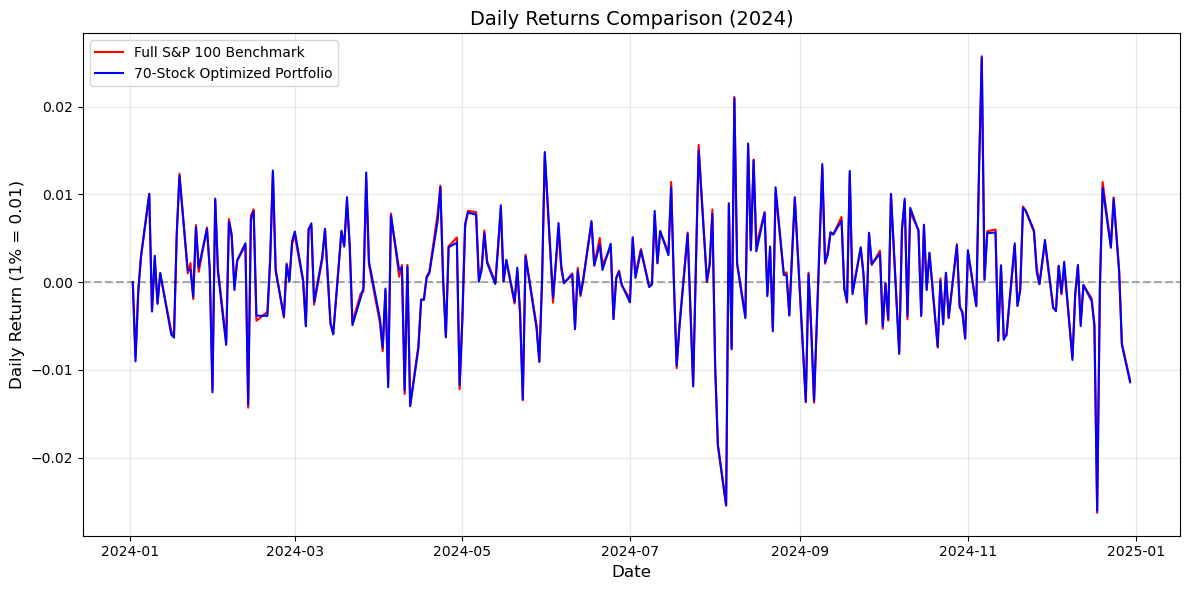

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=performance, x=performance.index, y='Benchmark', color='red', label='Full S&P 100 Benchmark') #Actual SP100 red
sns.lineplot(data=performance, x=performance.index, y='Optimized_Portfolio',color='blue', label='70-Stock Optimized Portfolio') #Our version blue
plt.axhline(0, color="black", linestyle="--", alpha=0.3)
plt.title("Daily Returns Comparison (2024)", fontsize=14)
plt.ylabel("Daily Return (1% = 0.01)", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

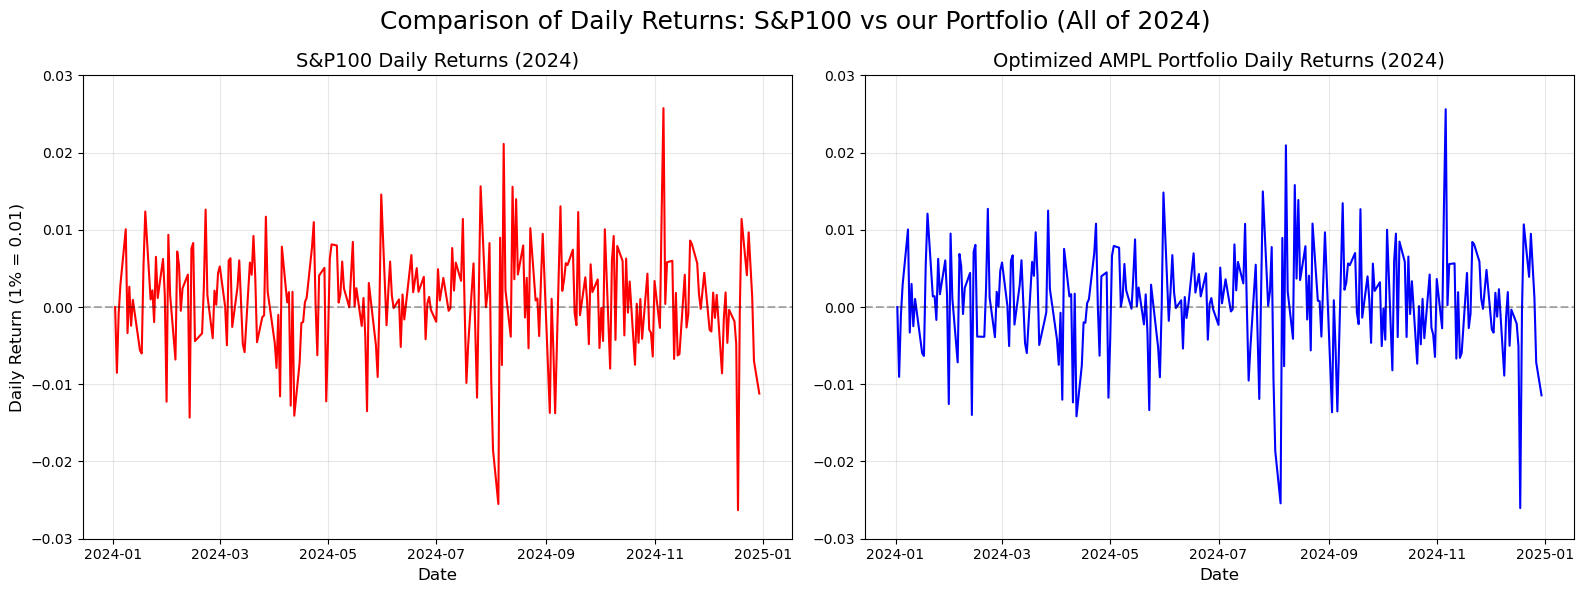

In [8]:
plt.figure(figsize=(16, 6))
plt.suptitle("Comparison of Daily Returns: S&P100 vs our Portfolio (All of 2024)",fontsize=18)

#SP100
plt.subplot(1, 2, 1)  #pos1
sns.lineplot(data=performance, x=performance.index, y='Benchmark', color='red')
plt.axhline(0, color="black", linestyle="--", alpha=0.3)
plt.title("S&P100 Daily Returns (2024)", fontsize=14)
plt.ylabel("Daily Return (1% = 0.01)", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.ylim(-0.03,0.03)
plt.grid(True, alpha=0.3)

#OUr stocks
plt.subplot(1, 2, 2) #pos2
sns.lineplot(data=performance, x=performance.index, y='Optimized_Portfolio', color='blue')
plt.axhline(0, color="black", linestyle="--", alpha=0.3)
plt.title("Optimized AMPL Portfolio Daily Returns (2024)", fontsize=14)
#plt.ylabel("Daily Return (1% = 0.01)", fontsize=12)
plt.ylabel("")
plt.ylim(-0.03,0.03)
plt.xlabel("Date", fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

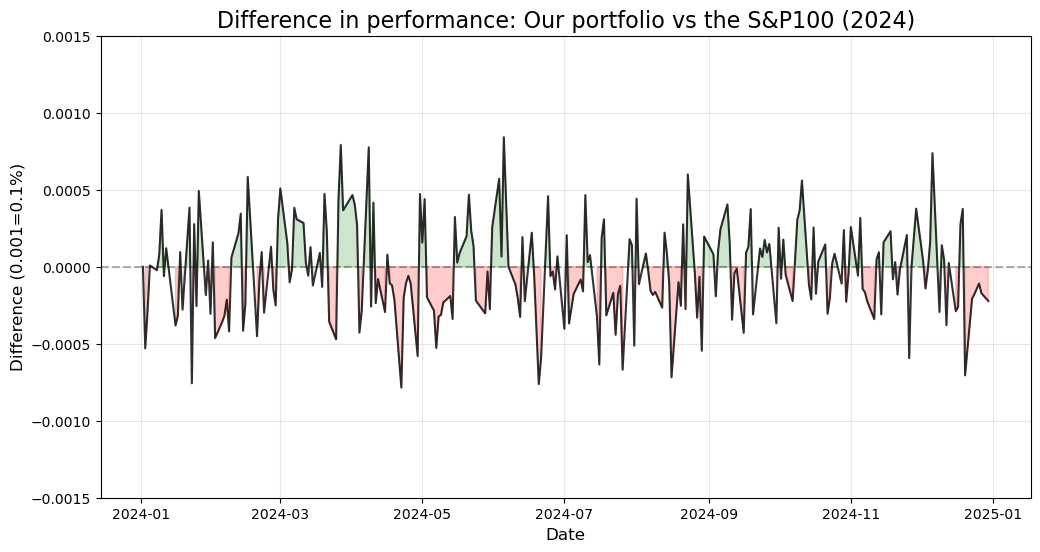

In [9]:
performance['Difference'] = performance['Optimized_Portfolio'] - performance['Benchmark']

#plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=performance, x=performance.index, y='Difference', 
             color='black', alpha=0.8)
plt.axhline(0, color="black", linestyle="--", alpha=0.3)
plt.title("Difference in performance: Our portfolio vs the S&P100 (2024)", fontsize=16)
plt.ylabel("Difference (0.001=0.1%)", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.ylim(-0.0015,0.0015)
plt.grid(True, alpha=0.3)

#fill positive and negatives
plt.fill_between(performance.index, performance['Difference'], 0, 
                 where=(performance['Difference'] > 0), 
                 color='green', alpha=0.2, interpolate=True)
plt.fill_between(performance.index, performance['Difference'], 0, 
                 where=(performance['Difference'] < 0), 
                 color='red', alpha=0.2)
plt.show()

## Q1

In [10]:
DRQ1 = performance[0:61]#Q1

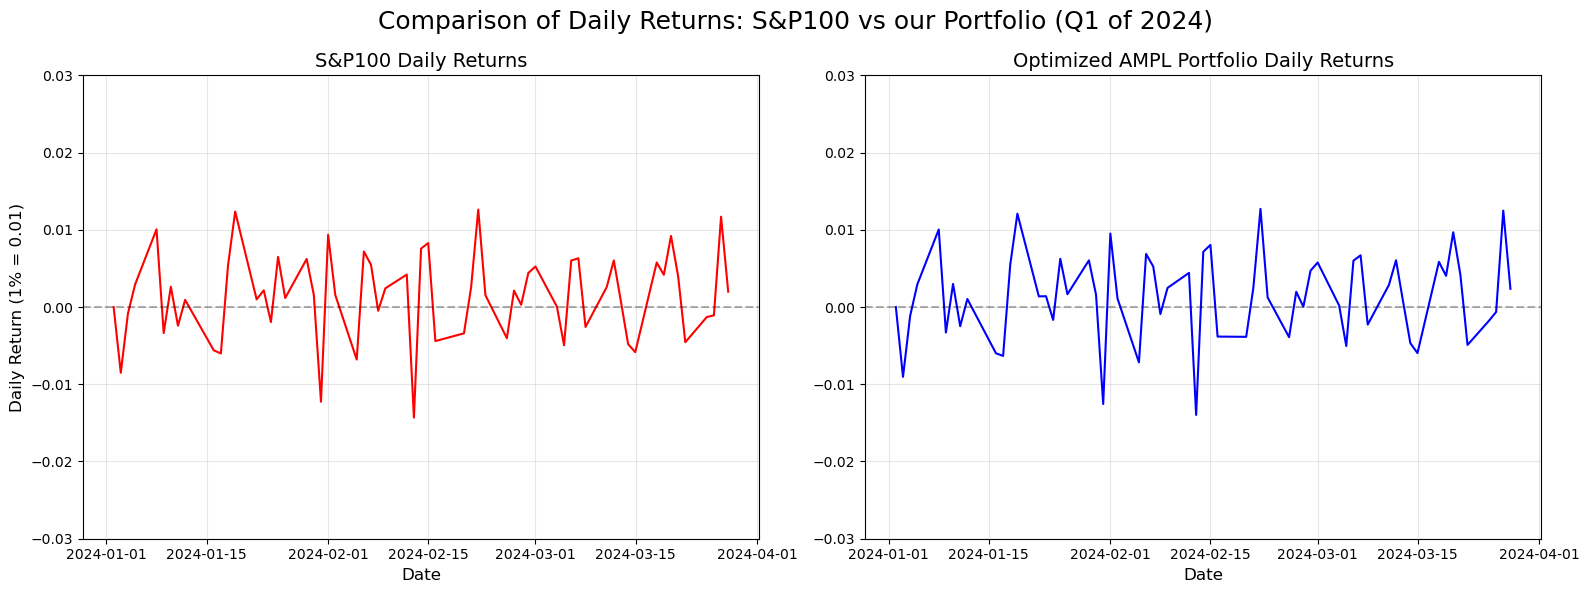

In [11]:
plt.figure(figsize=(16, 6))
plt.suptitle("Comparison of Daily Returns: S&P100 vs our Portfolio (Q1 of 2024)",fontsize=18)

#SP100
plt.subplot(1, 2, 1)  #pos1
sns.lineplot(data=DRQ1, x=DRQ1.index, y='Benchmark', color='red')
plt.axhline(0, color="black", linestyle="--", alpha=0.3)
plt.title("S&P100 Daily Returns", fontsize=14)
plt.ylabel("Daily Return (1% = 0.01)", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.ylim(-0.03,0.03)
plt.grid(True, alpha=0.3)

#OUr stocks
plt.subplot(1, 2, 2) #pos2
sns.lineplot(data=DRQ1, x=DRQ1.index, y='Optimized_Portfolio', color='blue')
plt.axhline(0, color="black", linestyle="--", alpha=0.3)
plt.title("Optimized AMPL Portfolio Daily Returns", fontsize=14)
#plt.ylabel("Daily Return (1% = 0.01)", fontsize=12)
plt.ylabel("")
plt.ylim(-0.03,0.03)
plt.xlabel("Date", fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

C:\Users\Hugh\AppData\Local\Temp\ipykernel_18036\2052563565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DRQ1['Difference'] = DRQ1['Optimized_Portfolio'] - DRQ1['Benchmark']


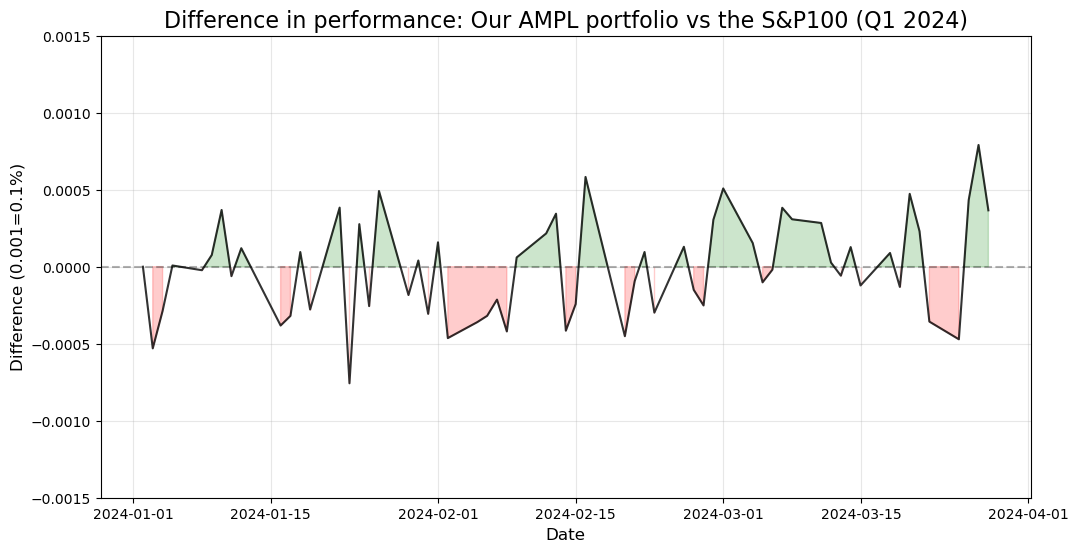

In [12]:
DRQ1['Difference'] = DRQ1['Optimized_Portfolio'] - DRQ1['Benchmark']

#plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=DRQ1, x=DRQ1.index, y='Difference', 
             color='black', alpha=0.8)
plt.axhline(0, color="black", linestyle="--", alpha=0.3)
plt.title("Difference in performance: Our AMPL portfolio vs the S&P100 (Q1 2024)", fontsize=16)
plt.ylabel("Difference (0.001=0.1%)", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.ylim(-0.0015,0.0015)
plt.grid(True, alpha=0.3)

#fill positive and negatives
plt.fill_between(DRQ1.index, DRQ1['Difference'], 0, 
                 where=(DRQ1['Difference'] > 0), 
                 color='green', alpha=0.2, interpolate=True)
plt.fill_between(DRQ1.index, DRQ1['Difference'], 0, 
                 where=(DRQ1['Difference'] < 0), 
                 color='red', alpha=0.2)
plt.show()

## Q2

In [13]:
DRQ2 = performance[0:124] #q2

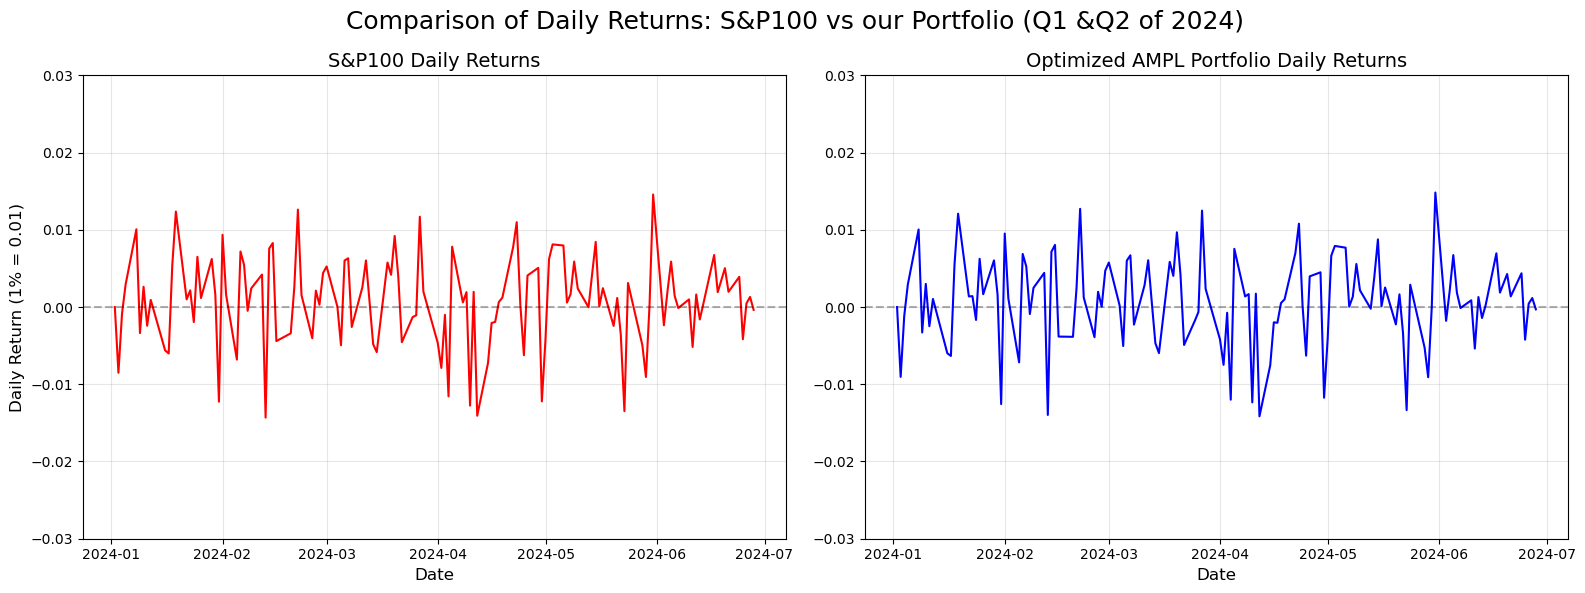

In [14]:
plt.figure(figsize=(16, 6))
plt.suptitle("Comparison of Daily Returns: S&P100 vs our Portfolio (Q1 &Q2 of 2024)",fontsize=18)
#SP100
plt.subplot(1, 2, 1)  #pos1
sns.lineplot(data=DRQ2, x=DRQ2.index, y='Benchmark', color='red')
plt.axhline(0, color="black", linestyle="--", alpha=0.3)
plt.title("S&P100 Daily Returns", fontsize=14)
plt.ylabel("Daily Return (1% = 0.01)", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.ylim(-0.03,0.03)
plt.grid(True, alpha=0.3)

#OUr stocks
plt.subplot(1, 2, 2) #pos2
sns.lineplot(data=DRQ2, x=DRQ2.index, y='Optimized_Portfolio', color='blue')
plt.axhline(0, color="black", linestyle="--", alpha=0.3)
plt.title("Optimized AMPL Portfolio Daily Returns", fontsize=14)
#plt.ylabel("Daily Return (1% = 0.01)", fontsize=12)
plt.ylabel("")
plt.ylim(-0.03,0.03)
plt.xlabel("Date", fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

C:\Users\Hugh\AppData\Local\Temp\ipykernel_18036\2085816961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DRQ2['Difference'] = DRQ2['Optimized_Portfolio'] - DRQ2['Benchmark']


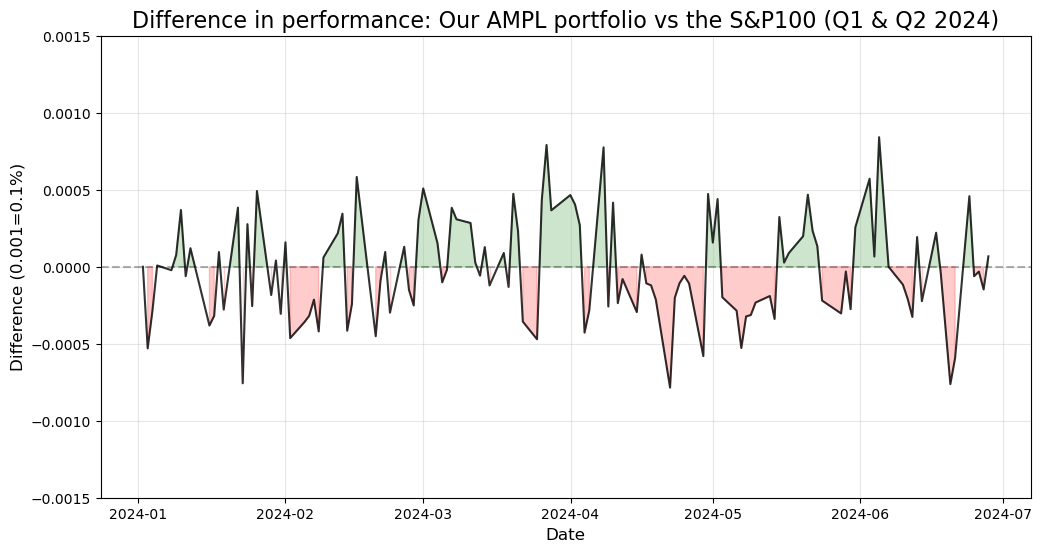

In [15]:
DRQ2['Difference'] = DRQ2['Optimized_Portfolio'] - DRQ2['Benchmark']

#plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=DRQ2, x=DRQ2.index, y='Difference', 
             color='black', alpha=0.8)
plt.axhline(0, color="black", linestyle="--", alpha=0.3)
plt.title("Difference in performance: Our AMPL portfolio vs the S&P100 (Q1 & Q2 2024)", fontsize=16)
plt.ylabel("Difference (0.001=0.1%)", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.ylim(-0.0015,0.0015)
plt.grid(True, alpha=0.3)

#fill positive and negatives
plt.fill_between(DRQ2.index, DRQ2['Difference'], 0, 
                 where=(DRQ2['Difference'] > 0), 
                 color='green', alpha=0.2, interpolate=True)
plt.fill_between(DRQ2.index, DRQ2['Difference'], 0, 
                 where=(DRQ2['Difference'] < 0), 
                 color='red', alpha=0.2)
plt.show()

## Q3

In [16]:
DRQ3 = performance[0:188] #q3

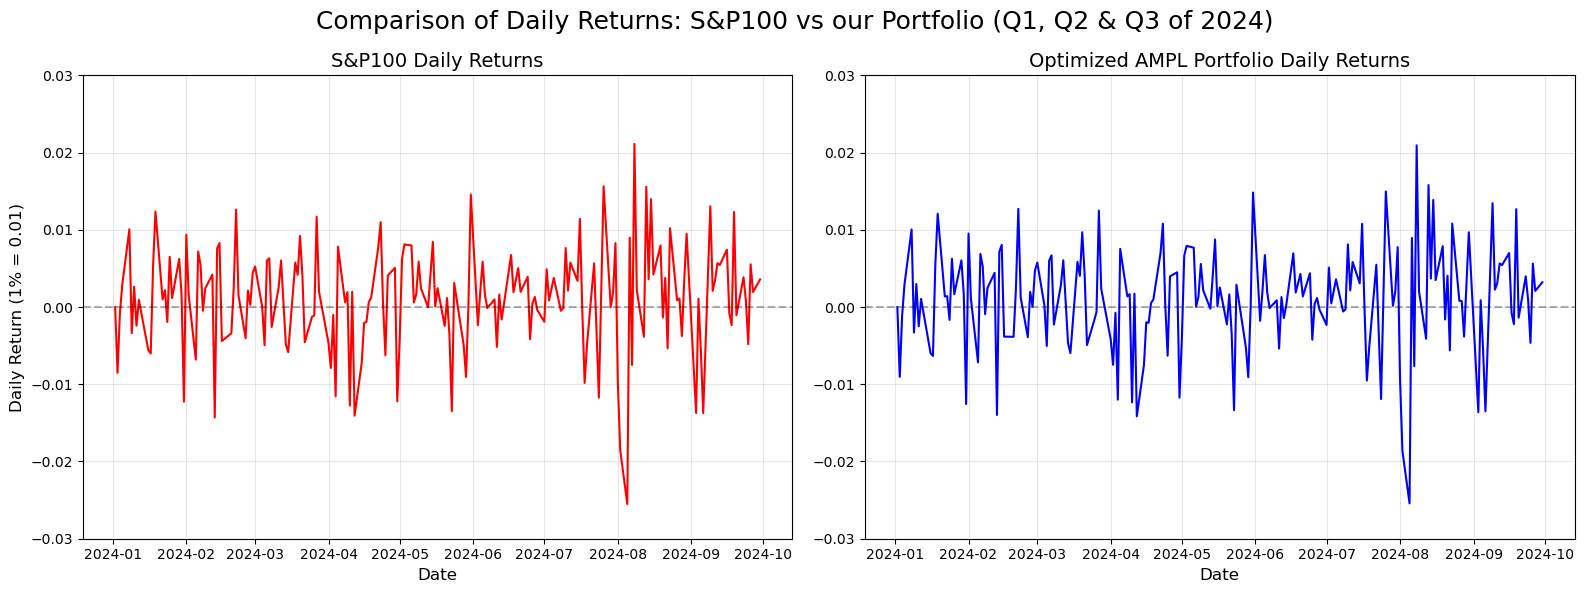

In [17]:
plt.figure(figsize=(16, 6))
plt.suptitle("Comparison of Daily Returns: S&P100 vs our Portfolio (Q1, Q2 & Q3 of 2024)",fontsize=18)

#SP100
plt.subplot(1, 2, 1)  #pos1
sns.lineplot(data=DRQ3, x=DRQ3.index, y='Benchmark', color='red')
plt.axhline(0, color="black", linestyle="--", alpha=0.3)
plt.title("S&P100 Daily Returns", fontsize=14)
plt.ylabel("Daily Return (1% = 0.01)", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.ylim(-0.03,0.03)
plt.grid(True, alpha=0.3)

#OUr stocks
plt.subplot(1, 2, 2) #pos2
sns.lineplot(data=DRQ3, x=DRQ3.index, y='Optimized_Portfolio', color='blue')
plt.axhline(0, color="black", linestyle="--", alpha=0.3)
plt.title("Optimized AMPL Portfolio Daily Returns", fontsize=14)
#plt.ylabel("Daily Return (1% = 0.01)", fontsize=12)
plt.ylabel("")
plt.ylim(-0.03,0.03)
plt.xlabel("Date", fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

C:\Users\Hugh\AppData\Local\Temp\ipykernel_18036\3923344690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DRQ3['Difference'] = DRQ3['Optimized_Portfolio'] - DRQ3['Benchmark']


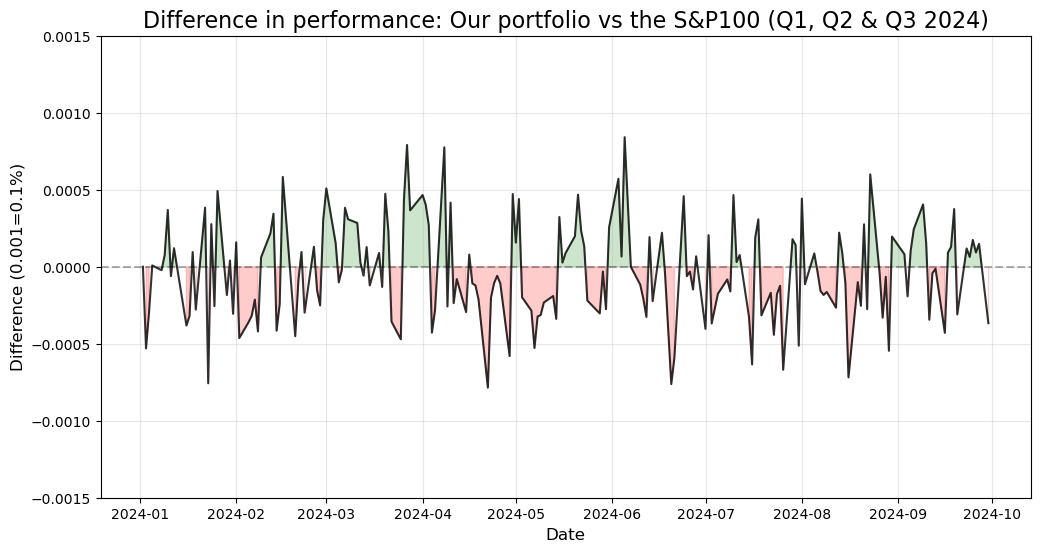

In [18]:
DRQ3['Difference'] = DRQ3['Optimized_Portfolio'] - DRQ3['Benchmark']

#plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=DRQ3, x=DRQ3.index, y='Difference', 
             color='black', alpha=0.8)
plt.axhline(0, color="black", linestyle="--", alpha=0.3)
plt.title("Difference in performance: Our portfolio vs the S&P100 (Q1, Q2 & Q3 2024)", fontsize=16)
plt.ylabel("Difference (0.001=0.1%)", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.ylim(-0.0015,0.0015)
plt.grid(True, alpha=0.3)

#fill positive and negatives
plt.fill_between(DRQ3.index, DRQ3['Difference'], 0, 
                 where=(DRQ3['Difference'] > 0), 
                 color='green', alpha=0.2, interpolate=True)
plt.fill_between(DRQ3.index, DRQ3['Difference'], 0, 
                 where=(DRQ3['Difference'] < 0), 
                 color='red', alpha=0.2)
plt.show()